In [7]:
import pandas as pd
pd.set_option('max_colwidth', 80)

from re import sub, split
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE, MDS
import seaborn as sns
import re

def plot_embedding(V, y):
    """ Visualizes a vocabulary embedding via TSNE """
    V = TruncatedSVD(50).fit_transform(V)
    d = TSNE(metric='cosine').fit_transform(V)
    d = pd.DataFrame(d).assign(label = y.reset_index(drop=True))
    return sns.scatterplot(x = 0, y = 1, hue = 'label', data = d), d


def clean_twitter(s):
    """ Cleans Twitter specific issues
    
    Should probably clean out mentions, URLs, and RT's.
    """

    # remove twitter handles (@user); URLs; RT; and random punctuation
    s = re.sub(r"([@#&]\w+)|https\S+|RT|:|;|\n|@", '', s)
    
    # remove emojis (https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python)
    s = s.encode('ascii', 'ignore').decode('ascii')
    
    # TODO: Use regular expressions to remove unwanted
    # text and clean up our tweets to be more usable!

    # BONUS: Try using the library "spacy" to 
    # do further processing, such as lemmatizing
    # or replacing Named Entities with constants (i.e. "[NAMED]")
    # or adding the part of speech or dependency code to the word 

    return s

#### Function to also keep only words

In [8]:
def clean_twitter_2(s):
    """ Cleans Twitter specific issues and keep only words     
    """
    
    # remove twitter handles (@user); URLs; RT; and random punctuation
    s = re.sub(r"([@#&]\w+)|https\S+|RT|:|;|\n|@", '', s)
    
    # keep only words
    s = re.sub("[^a-zA-Z]", " ", s)
    
    return s   

#### Function to use spaCy to lemmatize the text

In [9]:
import spacy

# Initialize spacy 'en' model
nlp = spacy.load('en')

def clean_twitter_3(s):
    """ Cleans Twitter specific issues    
    """
    
    # remove twitter handles (@user); URLs; RT; and random punctuation
    s = re.sub(r"([@#&]\w+)|https\S+|RT|:|;|\n|@", '', s)
    
    # keep only words
    s = re.sub("[^a-zA-Z]", " ", s)
    
    # Parse the tweet using the loaded 'en' model object `nlp`
    s = nlp(s)
    
    # Extract the lemma for each token and join
    " ".join([token.lemma_ for token in s])

    return s

    # BONUS: Try using the library "spacy" to 
    # do further processing, such as lemmatizing
    # or replacing Named Entities with constants (i.e. "[NAMED]")
    # or adding the part of speech or dependency code to the word 

In [10]:
X = pd.read_csv('data/tweets.csv').tweet
y = pd.read_csv('data/tweets.csv').label

#### Examine clean output

In [11]:
clean = X.map(clean_twitter)
clean.head(5)

0      Here's CNN on Sharia law. You can be stoned or have your hands cut off, bu...
1      LOOK obama Clinton cronies ILLEGALLY arm  train muslims terrorist includin...
2                                                       from 2013  gets crowned     
3                                             Say 'Islam is peace', or else!        
4                                                     All aboard the Trump Train!   
Name: tweet, dtype: object

In [12]:
clean_2 = X.map(clean_twitter_2)
clean_2.head(5)

0      Here s CNN on Sharia law  You can be stoned or have your hands cut off  bu...
1      LOOK obama Clinton cronies ILLEGALLY arm  train muslims terrorist includin...
2                                                       from       gets crowned     
3                                             Say  Islam is peace   or else         
4                                                    All aboard the Trump Train     
Name: tweet, dtype: object

In [13]:
clean_3 = X.map(clean_twitter_3)
clean_3.head(5)

0    (  , Here, s, CNN, on, Sharia, law,  , You, can, be, stoned, or, have, your,...
1    (  , LOOK, obama, Clinton, cronies, ILLEGALLY, arm,  , train, muslims, terro...
2                                         (     , from,       , gets, crowned,     )
3                             (  , Say,  , Islam, is, peace,   , or, else,         )
4                                        (   , All, aboard, the, Trump, Train,     )
Name: tweet, dtype: object

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

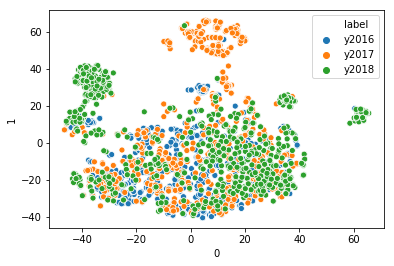

In [15]:
# Let's visualize our data by using nothing but the Sklearn default
# cleaning and tokenizing

vectorizer = CountVectorizer()
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

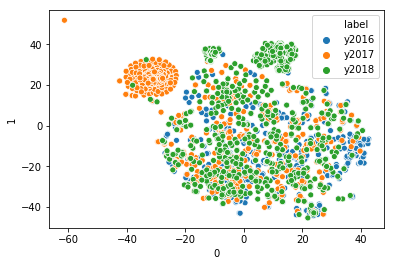

In [16]:
# Now let's see what our cleaning has done

vectorizer = CountVectorizer(preprocessor = clean_twitter)
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

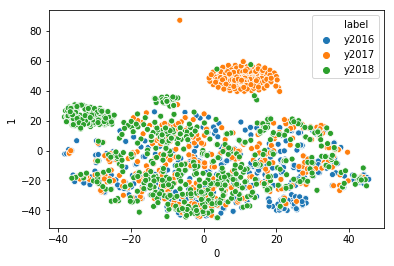

In [17]:
# Now let's see what our cleaning has done

vectorizer = CountVectorizer(preprocessor = clean_twitter_2)
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

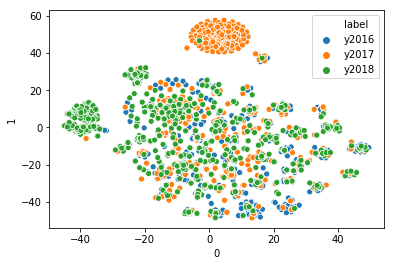

In [18]:
# Now try with TF-IDF vectorizer, and add implicit stopwords!
# Can you get things to separate in the space in a better way? 

from sklearn.feature_extraction import text

# add implicit stopwords! (not sure what was meant here)
my_stop_words = text.ENGLISH_STOP_WORDS.union(["online"])

tfidf_vectorizer = TfidfVectorizer(max_df=0.80, min_df=3, max_features=1000, stop_words=my_stop_words)

# TF-IDF feature matrix
V = tfidf_vectorizer.fit_transform(clean_2)
ax, d = plot_embedding(V, y)